In [7]:

import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [9]:
df = pd.read_csv('advertising.csv')
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
radio = df['radio'].to_numpy()
sales = df['sales'].to_numpy()

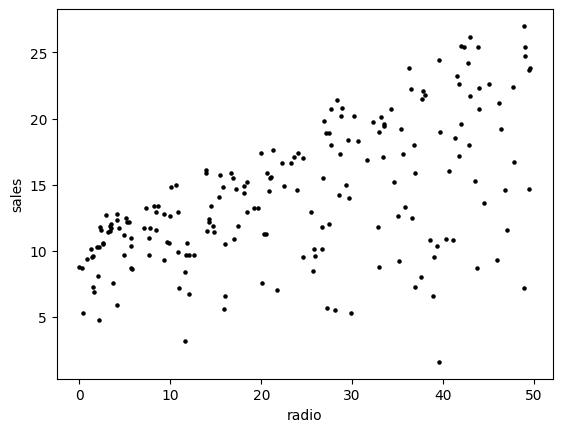

In [16]:
plt.scatter(radio, sales, s=5, c='k')
plt.xlabel('radio'), plt.ylabel('sales')
plt.show()

In [17]:
def gramschmidt(X):
    (r,p) = X.shape
    Q = np.zeros((r,p))
    R = np.zeros((p,p))
    for j in range(p):
        v = np.copy(X[:,j])
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], X[:,j])
            v -= R[i,j]*Q[:,i]
        R[j,j] = LA.norm(v)
        Q[:,j] = v/R[j,j]
    return Q, R

In [26]:
def backsubs(R,b):
    m = b.shape[0]
    x = np.zeros(m)
    for i in reversed(range(m)):
        x[i] = (b[i] - np.dot(R[i,i+1:m],x[i+1:m]))/R[i,i]
    return x

In [27]:
def ls_by_qr(X, b):
    Q, R = gramschmidt(X)
    return backsubs(R, Q.T @ b)

In [28]:
radio = df['radio'].to_numpy()
sales = df['sales'].to_numpy()
n = np.size(radio)
X = np.stack((np.ones(n), radio), axis =-1)
coeff = ls_by_qr(X,sales)

In [35]:
print(coeff[0])

9.311638095158289


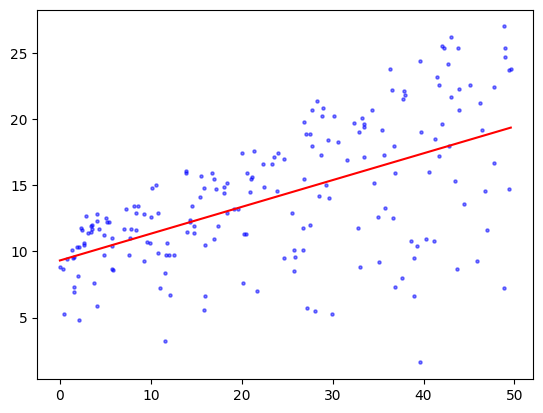

In [31]:
radiogrid = np.linspace(radio.min(), radio.max(), num=100)
plt.scatter(radio, sales, s=5, c='b', alpha=0.5)
plt.plot(radiogrid, coeff[0]+coeff[1]*radiogrid, 'r')
plt.show()

In [44]:
X = np.stack((np.ones(n), radio, radio**2), axis=-1)
coeff = ls_by_qr(X,sales)
print(coeff)

[9.48610308e+00 1.78888807e-01 4.92713161e-04]


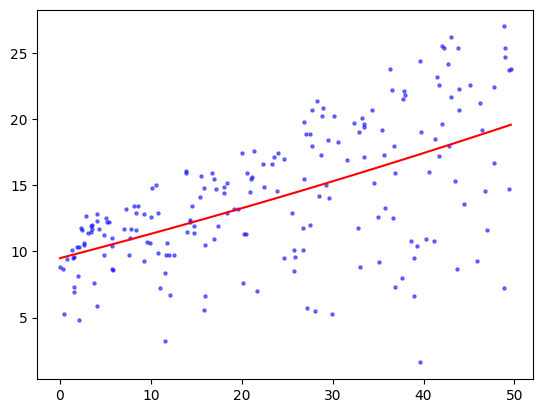

In [45]:
plt.scatter(radio, sales, s=5, c='b', alpha=0.5)
plt.plot(radiogrid, coeff[0] + coeff[1] *radiogrid + coeff[2] * radiogrid**2, 'r')
plt.show()